# Analytics 

## 4. Data Analysis and Visualization <a name="data-analysis-and-visualization"></a>
- Explore the data through visualizations (using libraries like Matplotlib, Seaborn, etc.)
- Conduct statistical analysis if applicable
- Extract insights from the data
<hr>

# Table of Contents
1. [Jobs](#Jobs)
2. [Techs](#techs)
3. [Jobs / skills relationship](#jobs-skills-relationship)

<hr>


### 1- Jobs <a name="Jobs"></a>
* Most trending jobs 
* Related jobs 
* Age range for each job 


In [104]:
#Libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as se 
from matplotlib import cm
from matplotlib.colors import Normalize

In [5]:
# "DevType column"
# from the previous notebook 
# unique_answers file contain unique values of each column with multiple nswers 
jobs_freq = pd.read_pickle("..//Datasets//unique_answers.pkl")['DevType']
jobs = pd.read_pickle("..//Datasets//DevType.pkl")
df = pd.read_pickle("..//Datasets//processed_data.pkl")

## Trending jobs

In [6]:
#checkup 
jobs_freq = jobs_freq.sort_values(ascending=False)
jobs_freq


Developer, full-stack                            32891
Developer, back-end                              29071
Developer, front-end                             18231
Developer, desktop or enterprise applications    11036
Developer, mobile                                 9800
DevOps specialist                                 7058
System administrator                              6079
Database administrator                            5655
Designer                                          4611
Developer, embedded applications or devices       4598
Data scientist or machine learning specialist     4273
Student                                           4187
Engineer, data                                    4176
Engineering manager                               3810
Data or business analyst                          3792
Developer, QA or test                             3611
Other (please specify):                           3545
Product manager                                   3074
Academic r

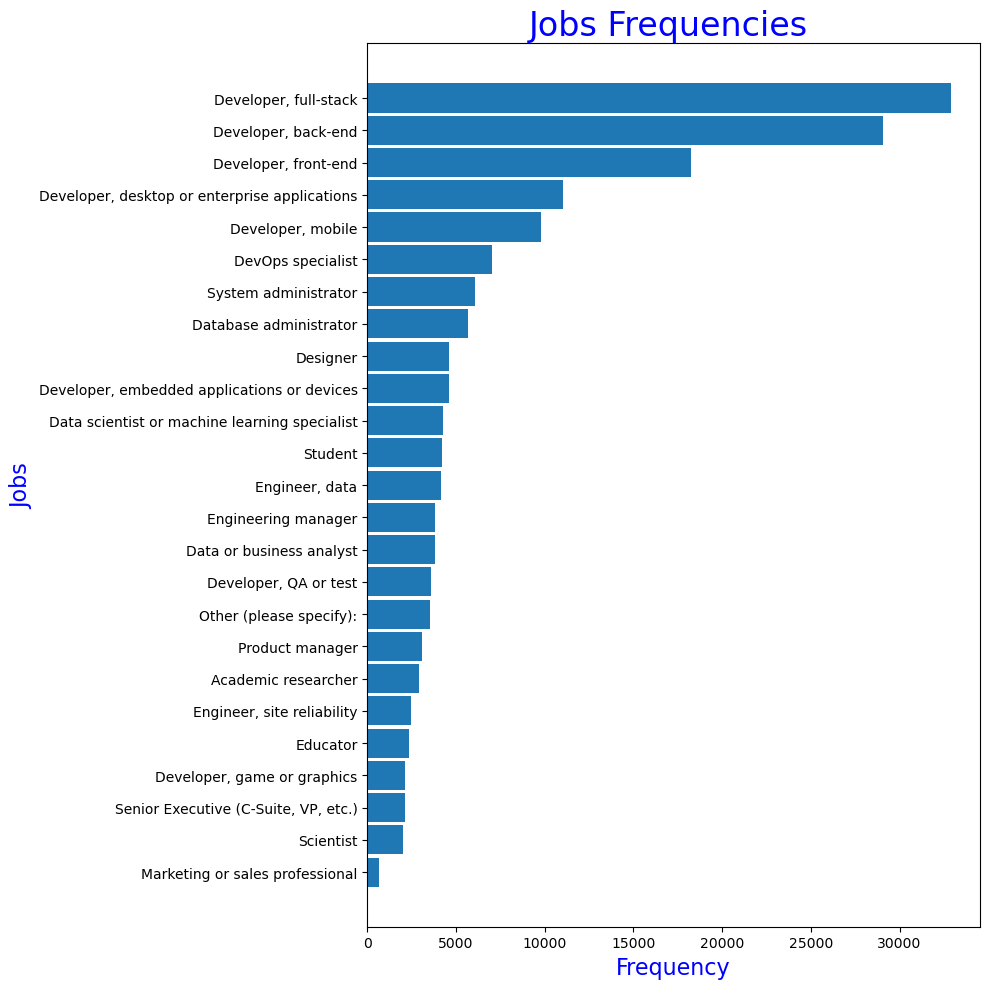

In [7]:
#Visualize 
plt.figure(figsize=(10,10))
ticks = jobs_freq.sort_values().index
values = jobs_freq.sort_values().values
plt.barh(ticks,values,height=0.9)
plt.xlabel('Frequency',color='blue',fontsize=16)
plt.ylabel('Jobs',color='blue',fontsize=16)
plt.title("Jobs Frequencies ",color='blue',fontsize=24)
plt.tight_layout()

plt.savefig('..//Figures//Job Frequencies.jpg',bbox_inches='tight')


In [8]:
# jobs data frame for dummies values for differnt jobs
jobs.head()

,Academic researcher,Data or business analyst,Data scientist or machine learning specialist,Database administrator,Designer,DevOps specialist,"Developer, QA or test","Developer, back-end","Developer, desktop or enterprise applications","Developer, embedded applications or devices",...,"Engineer, data","Engineer, site reliability",Engineering manager,Marketing or sales professional,Other (please specify):,Product manager,Scientist,"Senior Executive (C-Suite, VP, etc.)",Student,System administrator
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0


## Differnt correlation methods to use , and the one used for binary columns

<table border="1">
  <thead>
    <tr>
      <th>Aspect</th>
      <th>Phi Coefficient (φ)</th>
      <th>Pearson Correlation Coefficient (Pearson's r)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Applicability</td>
      <td>Used for binary variables (0s and 1s).</td>
      <td>Used for continuous variables.</td>
    </tr>
    <tr>
      <td>Range of Values</td>
      <td>Ranges from -1 to 1.</td>
      <td>Ranges from -1 to 1.</td>
    </tr>
    <tr>
      <td>Data Type</td>
      <td>Suitable for binary data.</td>
      <td>Suitable for continuous data.</td>
    </tr>
    <tr>
      <td>Interpretation</td>
      <td>
        -1 indicates a perfect negative correlation.<br>
        0 indicates no correlation.<br>
        1 indicates a perfect positive correlation.
      </td>
      <td>
        -1 indicates a perfect negative correlation.<br>
        0 indicates no correlation.<br>
        1 indicates a perfect positive correlation.
      </td>
    </tr>
    <tr>
      <td>Calculation</td>
      <td>
        - Based on the number of concordant and discordant pairs.<br>
        - Suitable for ordinal or binary data.
      </td>
      <td>
        - Involves means and standard deviations.<br>
        - Assumes linearity and normality.
      </td>
    </tr>
    <tr>
      <td>Use Cases</td>
      <td>
        - Analyzing association between two binary variables.<br>
        - Suitable for categorical or ordinal data.
      </td>
      <td>
        - Analyzing association between two continuous variables.<br>
        - Commonly used in various fields.
      </td>
    </tr>
    <tr>
      <td>Robustness</td>
      <td>Robust to outliers and non-normality.</td>
      <td>Sensitive to outliers.</td>
    </tr>
  </tbody>
</table>


## Correlated Jobs 

<Axes: >

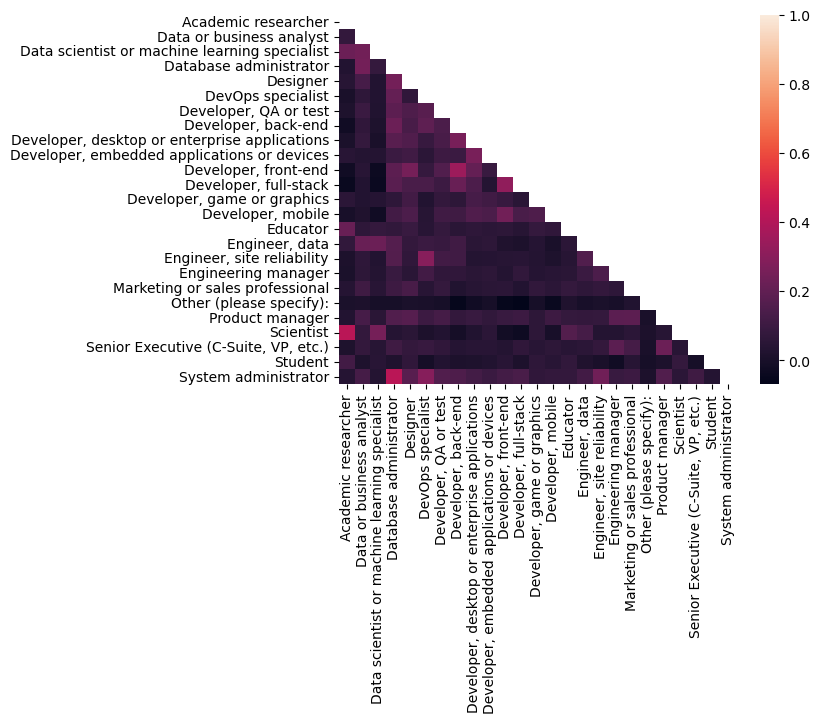

In [9]:
#Pearson Correlation Coefficient (Pearson's r)
mask = np.triu(jobs.corr(),k=0)
se.heatmap(jobs.corr(),mask=mask,vmax=1)

In [10]:
# Phi Coefficient (φ)	
from phik import phik_matrix
corr = phik_matrix(jobs)

interval columns not set, guessing: ['Academic researcher', 'Data or business analyst', 'Data scientist or machine learning specialist', 'Database administrator', 'Designer', 'DevOps specialist', 'Developer, QA or test', 'Developer, back-end', 'Developer, desktop or enterprise applications', 'Developer, embedded applications or devices', 'Developer, front-end', 'Developer, full-stack', 'Developer, game or graphics', 'Developer, mobile', 'Educator', 'Engineer, data', 'Engineer, site reliability', 'Engineering manager', 'Marketing or sales professional', 'Other (please specify):', 'Product manager', 'Scientist', 'Senior Executive (C-Suite, VP, etc.)', 'Student', 'System administrator']


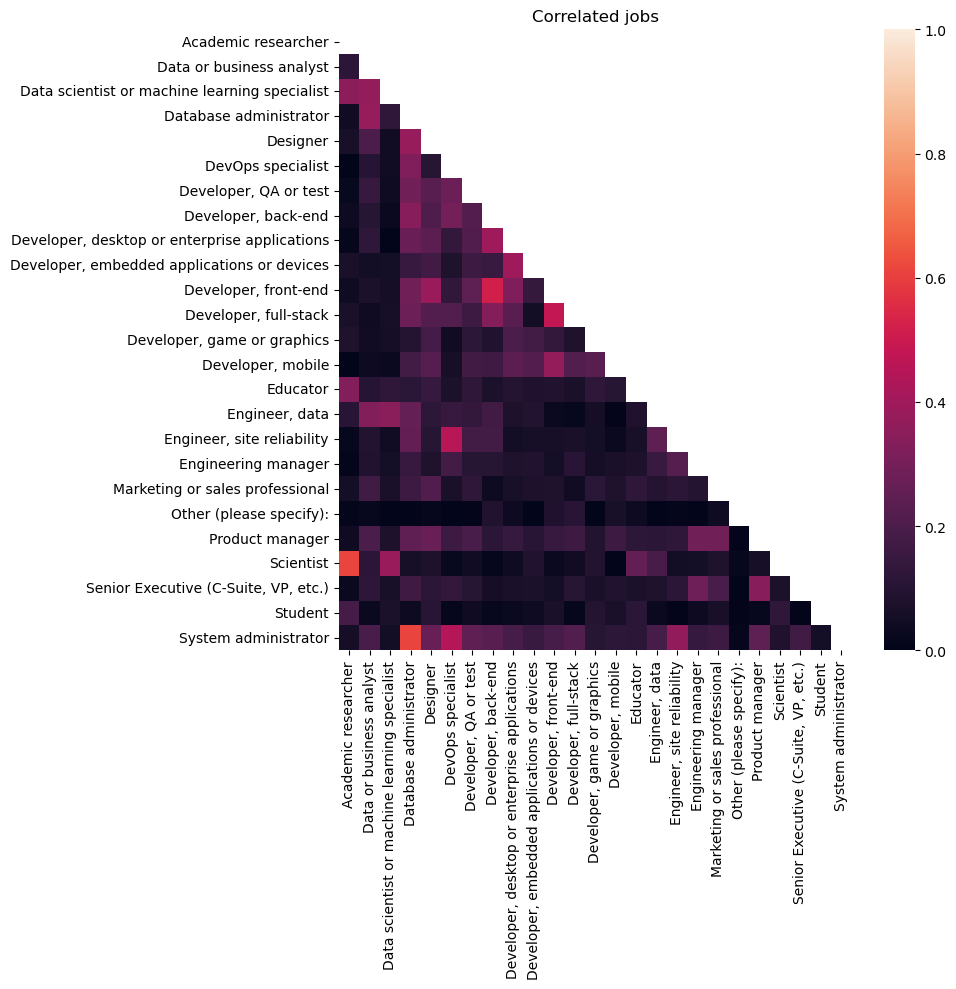

In [11]:
plt.figure(figsize=(10,10))
se.heatmap(corr,mask=mask,vmax=1)
plt.title("Correlated jobs")
plt.tight_layout()

plt.savefig("..//Figures//Correlated Jobs",bbox_inches='tight')


## Age Vs Jobs

In [12]:
df['Age'].unique()

array(['25-34 years old', '18-24 years old', '35-44 years old',
       'Prefer not to say', '45-54 years old', 'Under 18 years old',
       '65 years or older', '55-64 years old'], dtype=object)

In [13]:
age_jobs = pd.concat([df[['Age']],jobs],axis=1)
age_jobs.head()

,Age,Academic researcher,Data or business analyst,Data scientist or machine learning specialist,Database administrator,Designer,DevOps specialist,"Developer, QA or test","Developer, back-end","Developer, desktop or enterprise applications",...,"Engineer, data","Engineer, site reliability",Engineering manager,Marketing or sales professional,Other (please specify):,Product manager,Scientist,"Senior Executive (C-Suite, VP, etc.)",Student,System administrator
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,25-34 years old,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18-24 years old,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,18-24 years old,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,35-44 years old,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,25-34 years old,0,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0


In [14]:
#Ages 
age_jobs = age_jobs.groupby('Age').sum()
age_jobs

,Academic researcher,Data or business analyst,Data scientist or machine learning specialist,Database administrator,Designer,DevOps specialist,"Developer, QA or test","Developer, back-end","Developer, desktop or enterprise applications","Developer, embedded applications or devices",...,"Engineer, data","Engineer, site reliability",Engineering manager,Marketing or sales professional,Other (please specify):,Product manager,Scientist,"Senior Executive (C-Suite, VP, etc.)",Student,System administrator
Age,,,,,,,,,,,,,,,,,,,,,
18-24 years old,422,457,704,789,868,737,547,4931,1549,726,...,573,253,145,99,492,283,218,118,2457,820
25-34 years old,1377,1540,2073,2185,1673,3198,1648,13643,4323,1943,...,2039,1130,1487,211,1332,1254,870,641,1072,2350
35-44 years old,686,1006,960,1478,1001,2167,885,6811,2887,1059,...,948,752,1474,189,965,979,531,773,182,1656
45-54 years old,235,506,327,783,559,680,336,2375,1427,525,...,374,213,504,74,458,370,208,366,47,786
55-64 years old,92,183,93,255,264,155,116,696,529,200,...,125,42,123,32,176,117,100,136,13,255
65 years or older,18,32,20,34,59,23,14,85,86,42,...,26,13,20,11,34,14,33,20,6,37
Prefer not to say,47,45,60,66,66,64,44,318,128,51,...,63,25,43,8,48,37,42,36,52,85
Under 18 years old,22,23,36,65,121,34,21,212,107,52,...,28,20,14,14,40,20,13,13,358,90


<Figure size 5000x5000 with 0 Axes>

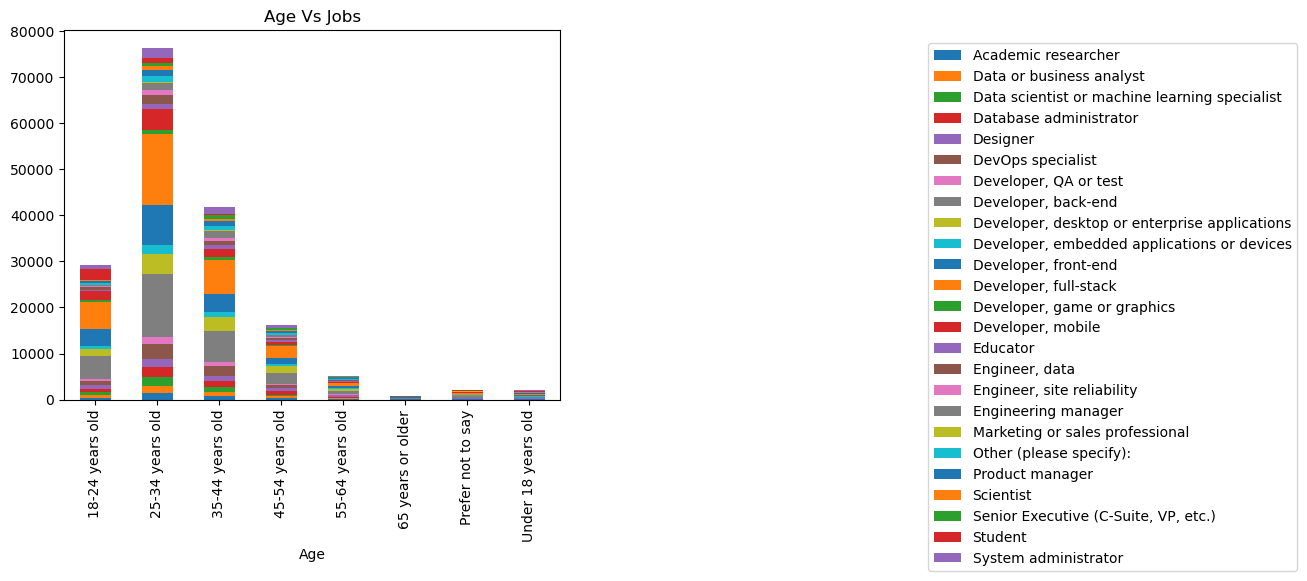

In [15]:
plt.figure(figsize=(50,50))
age_jobs.plot.bar(stacked=True)
plt.legend(loc='right',bbox_to_anchor=(2, 0., 0.5, 0.5))
plt.title("Age Vs Jobs")

plt.savefig("..//Figures//Correlated Jobs.png",bbox_inches='tight')

In [16]:
df.columns

Index(['MainBranch', 'Employment', 'Country', 'EdLevel', 'Age1stCode',
       'LearnCode', 'YearsCode', 'YearsCodePro', 'DevType', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'NEWCollabToolsHaveWorkedWith', 'OpSys',
       'Age'],
      dtype='object')

### 2- Techs <a name="techs"></a>
* Most trending techs
* Related techs



### skills are devided into previous skills and needed skills and wrong skills as following .
#### skills are classified based on job , where the skill needed or not 

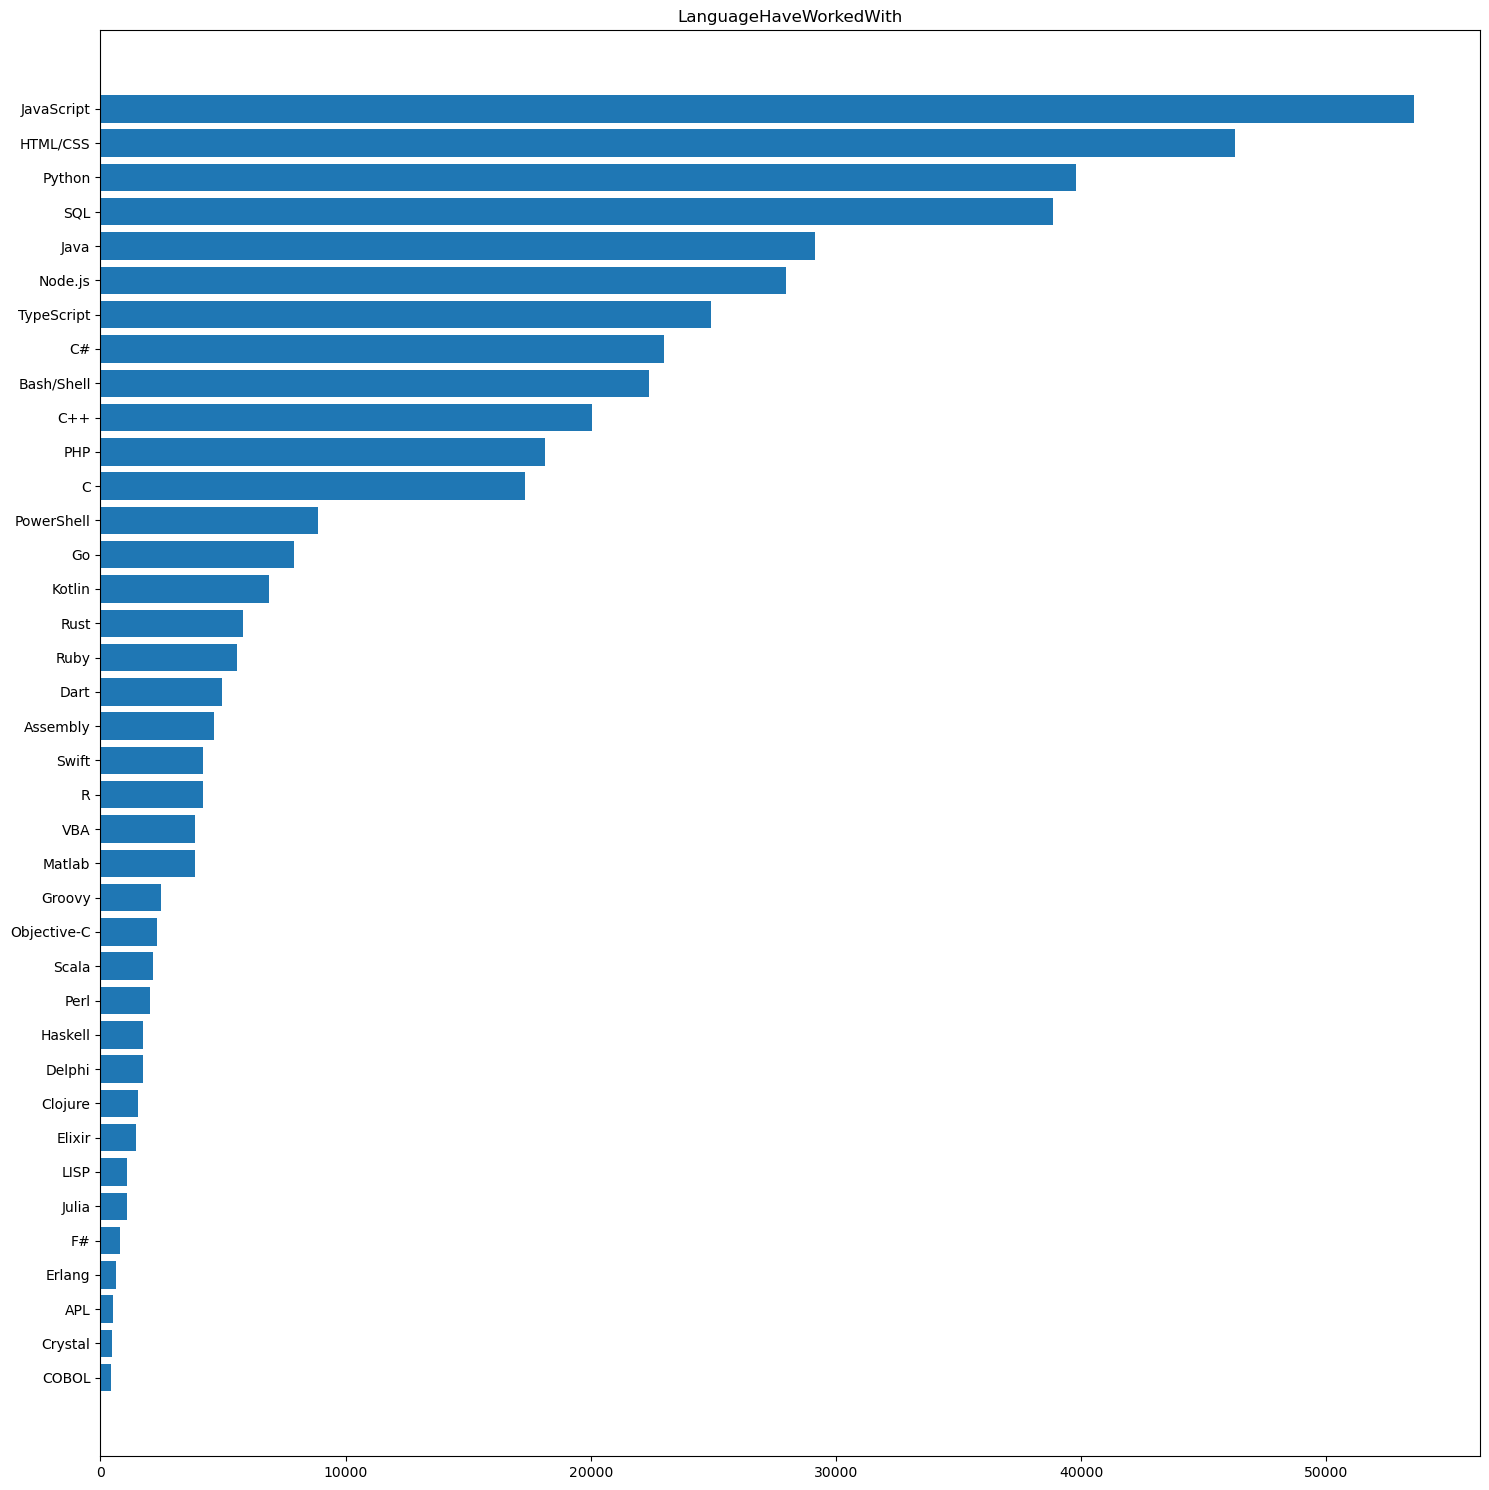

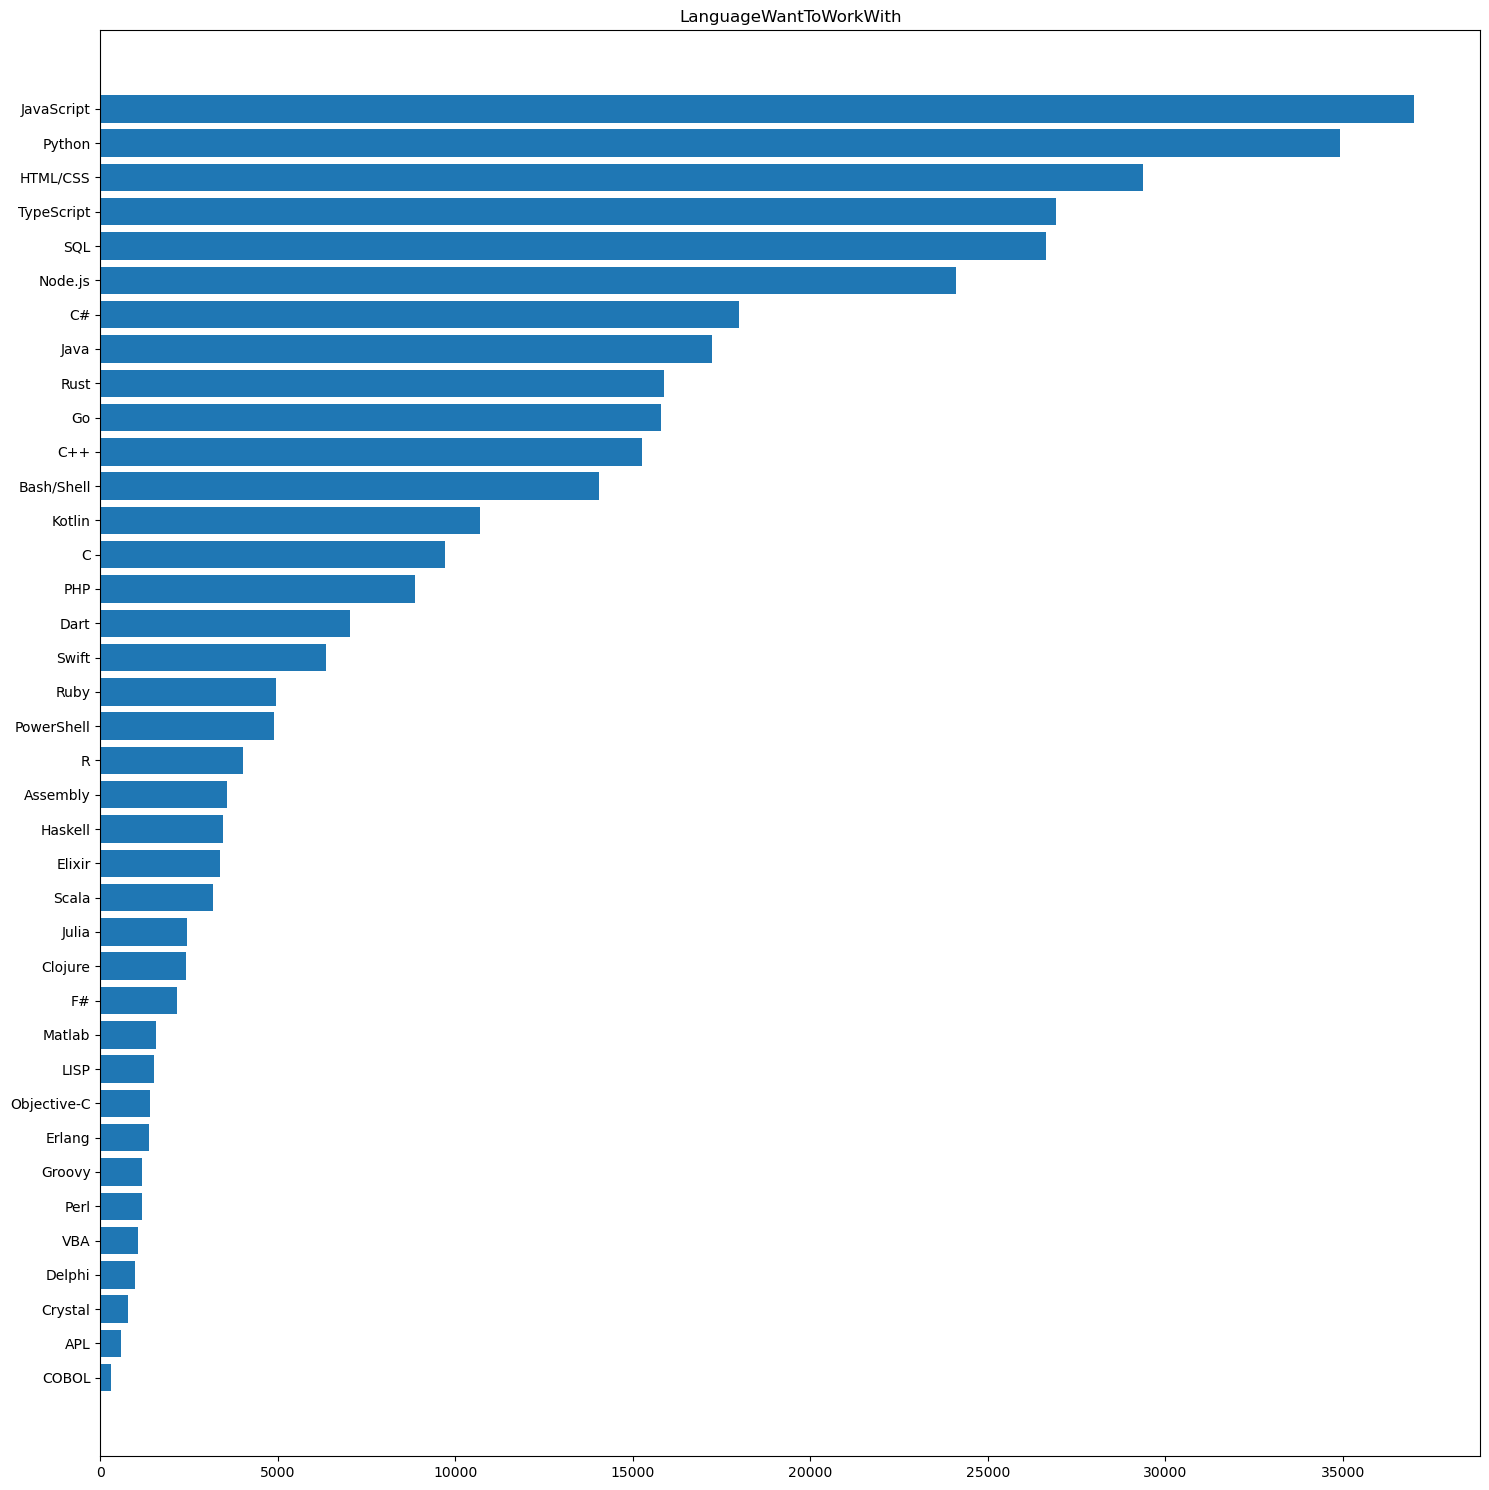

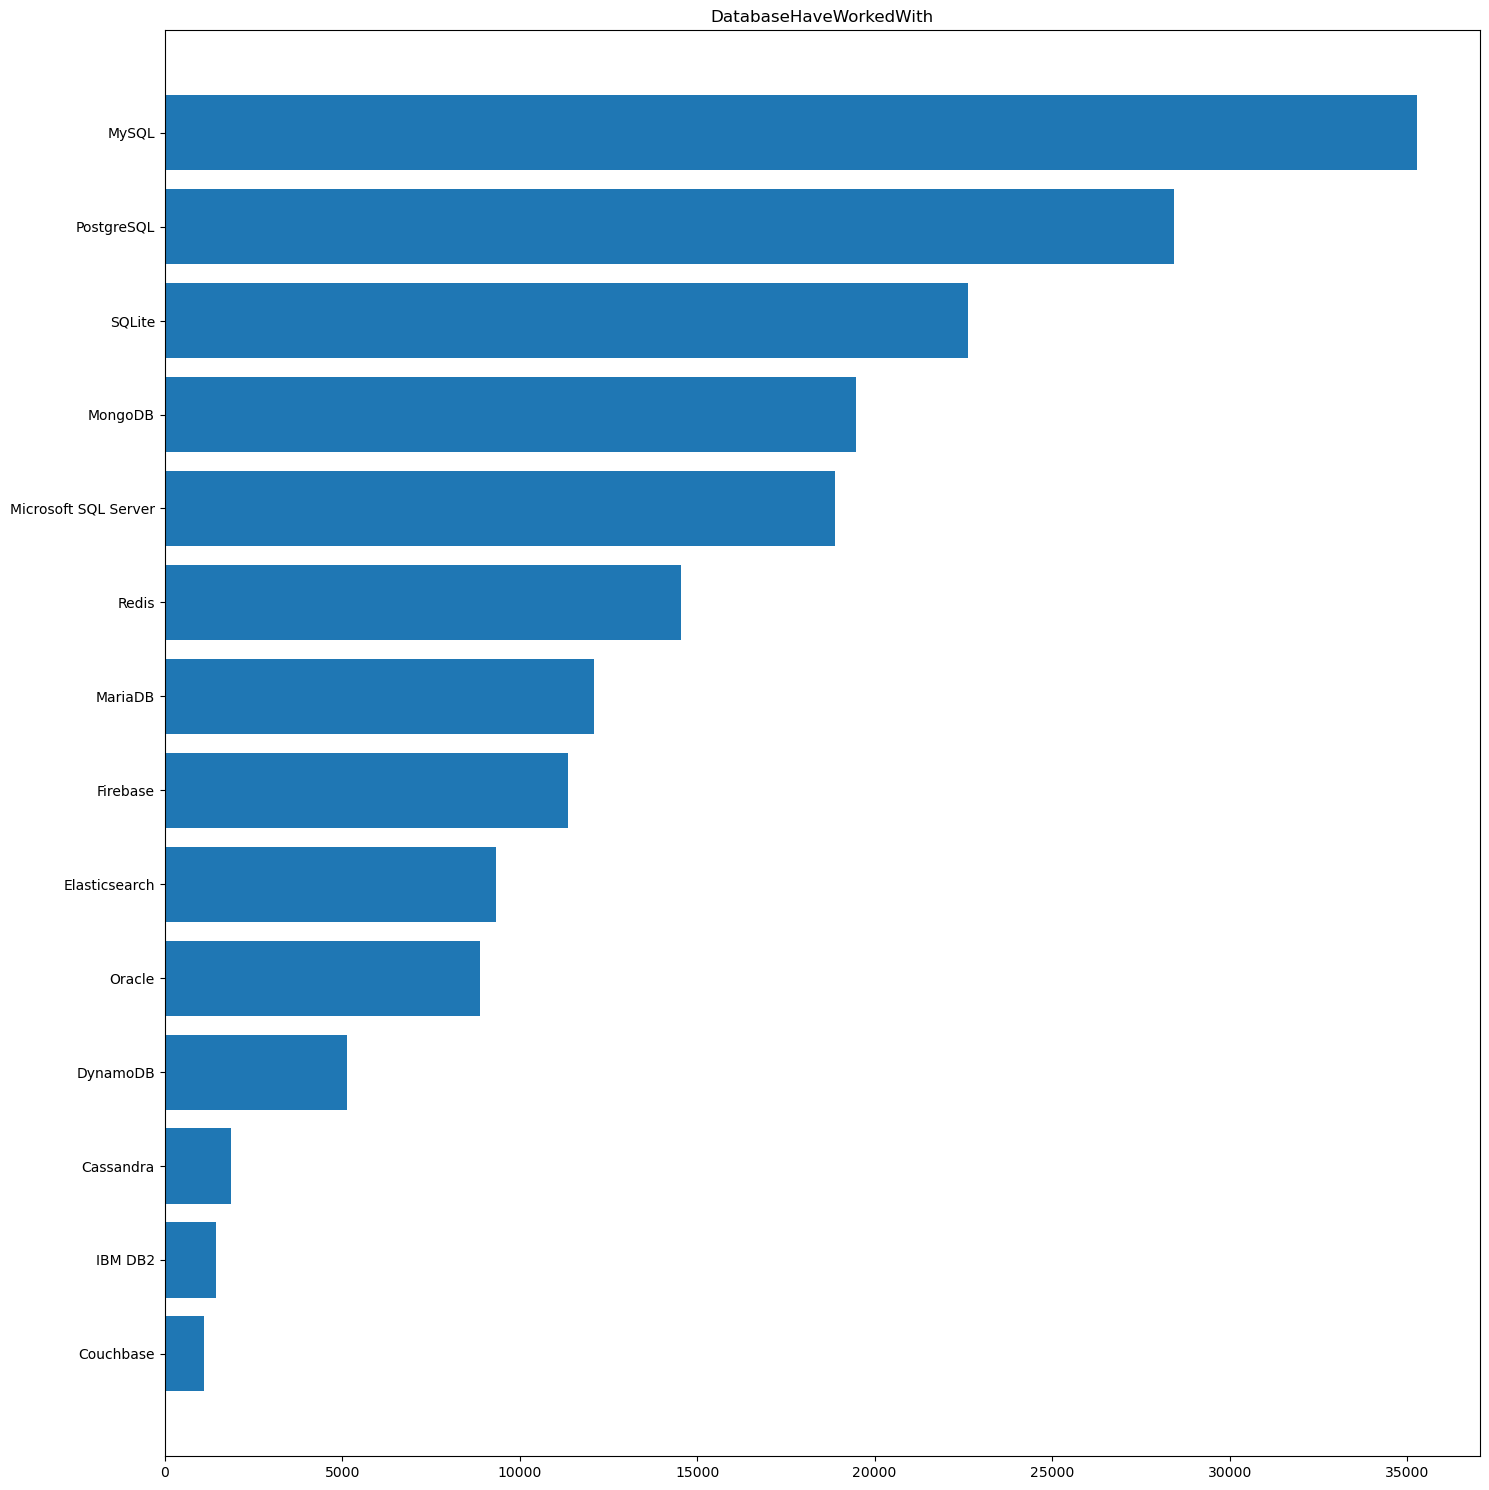

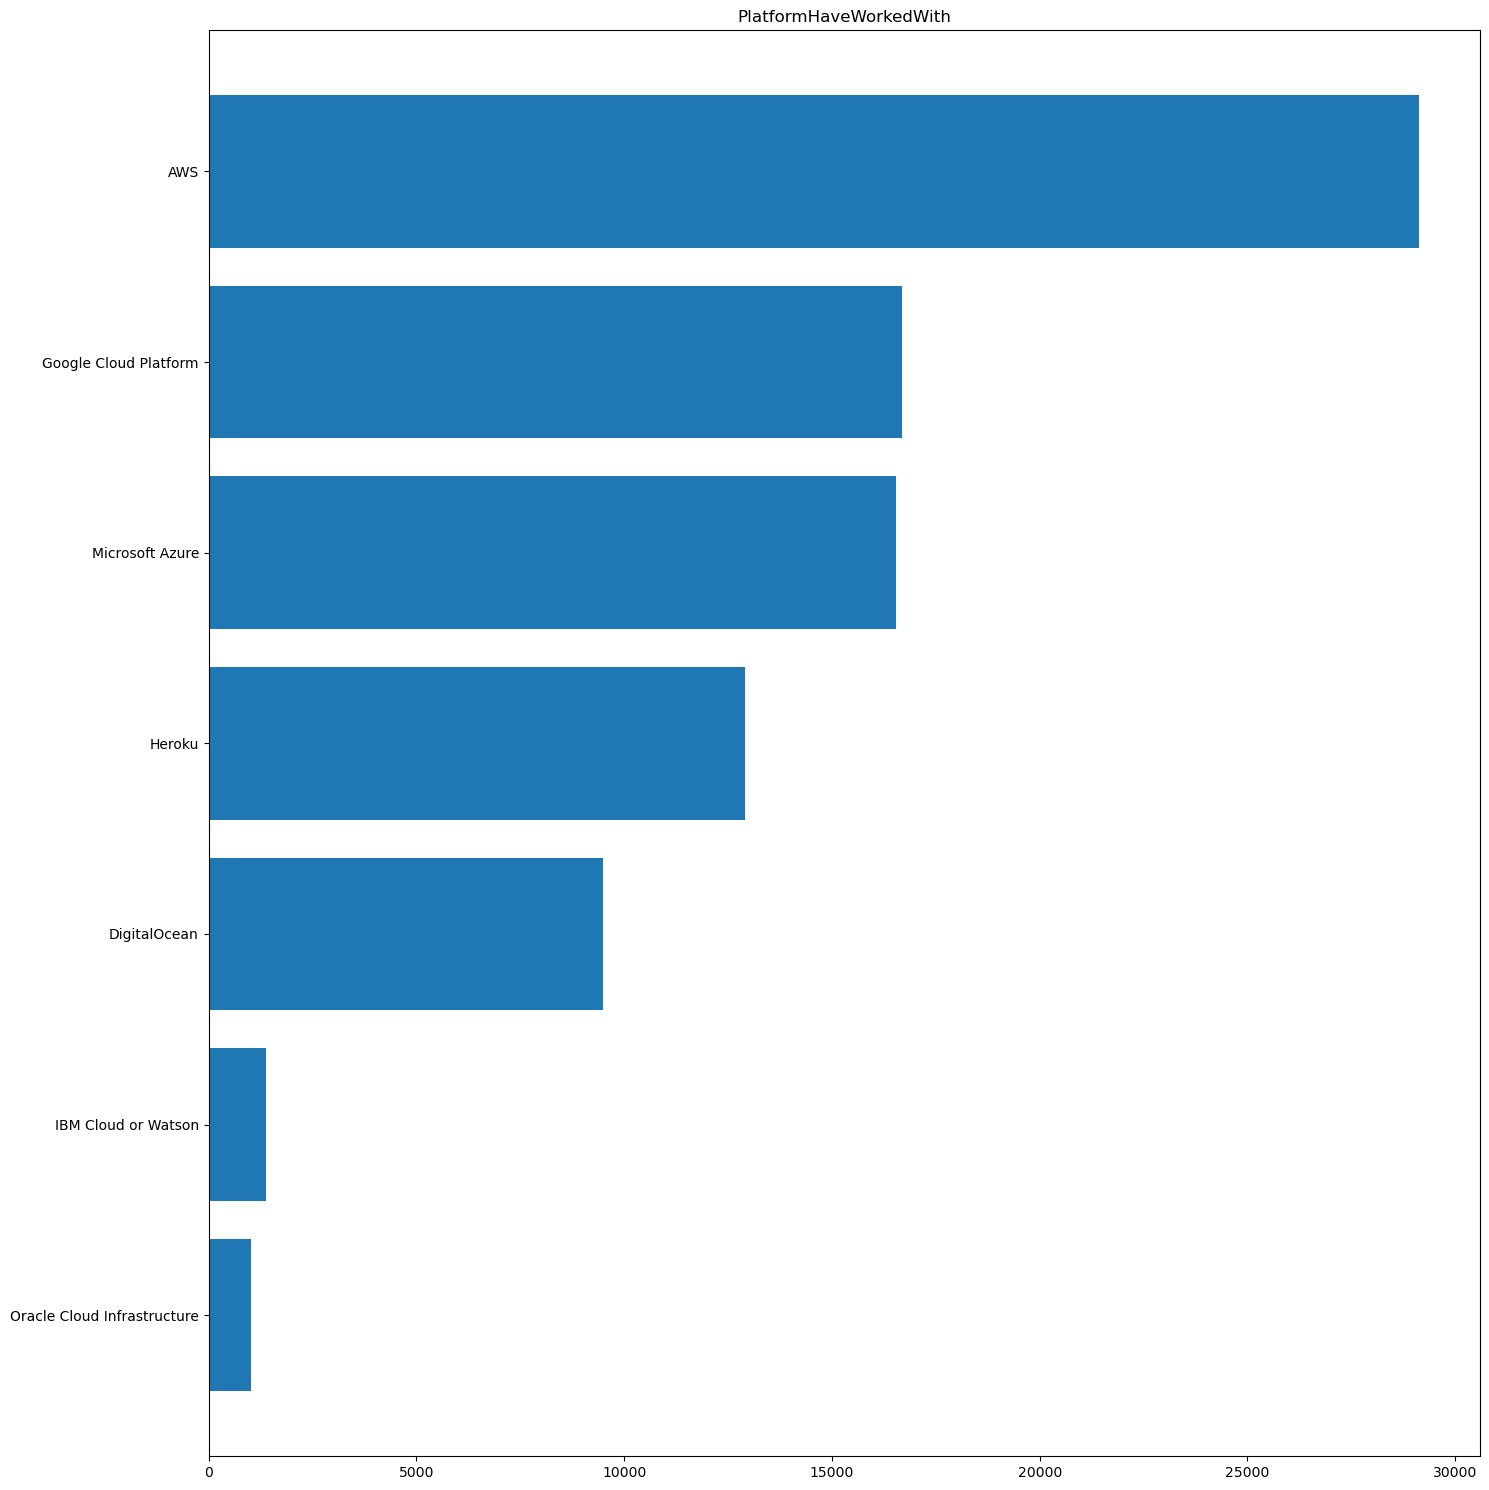

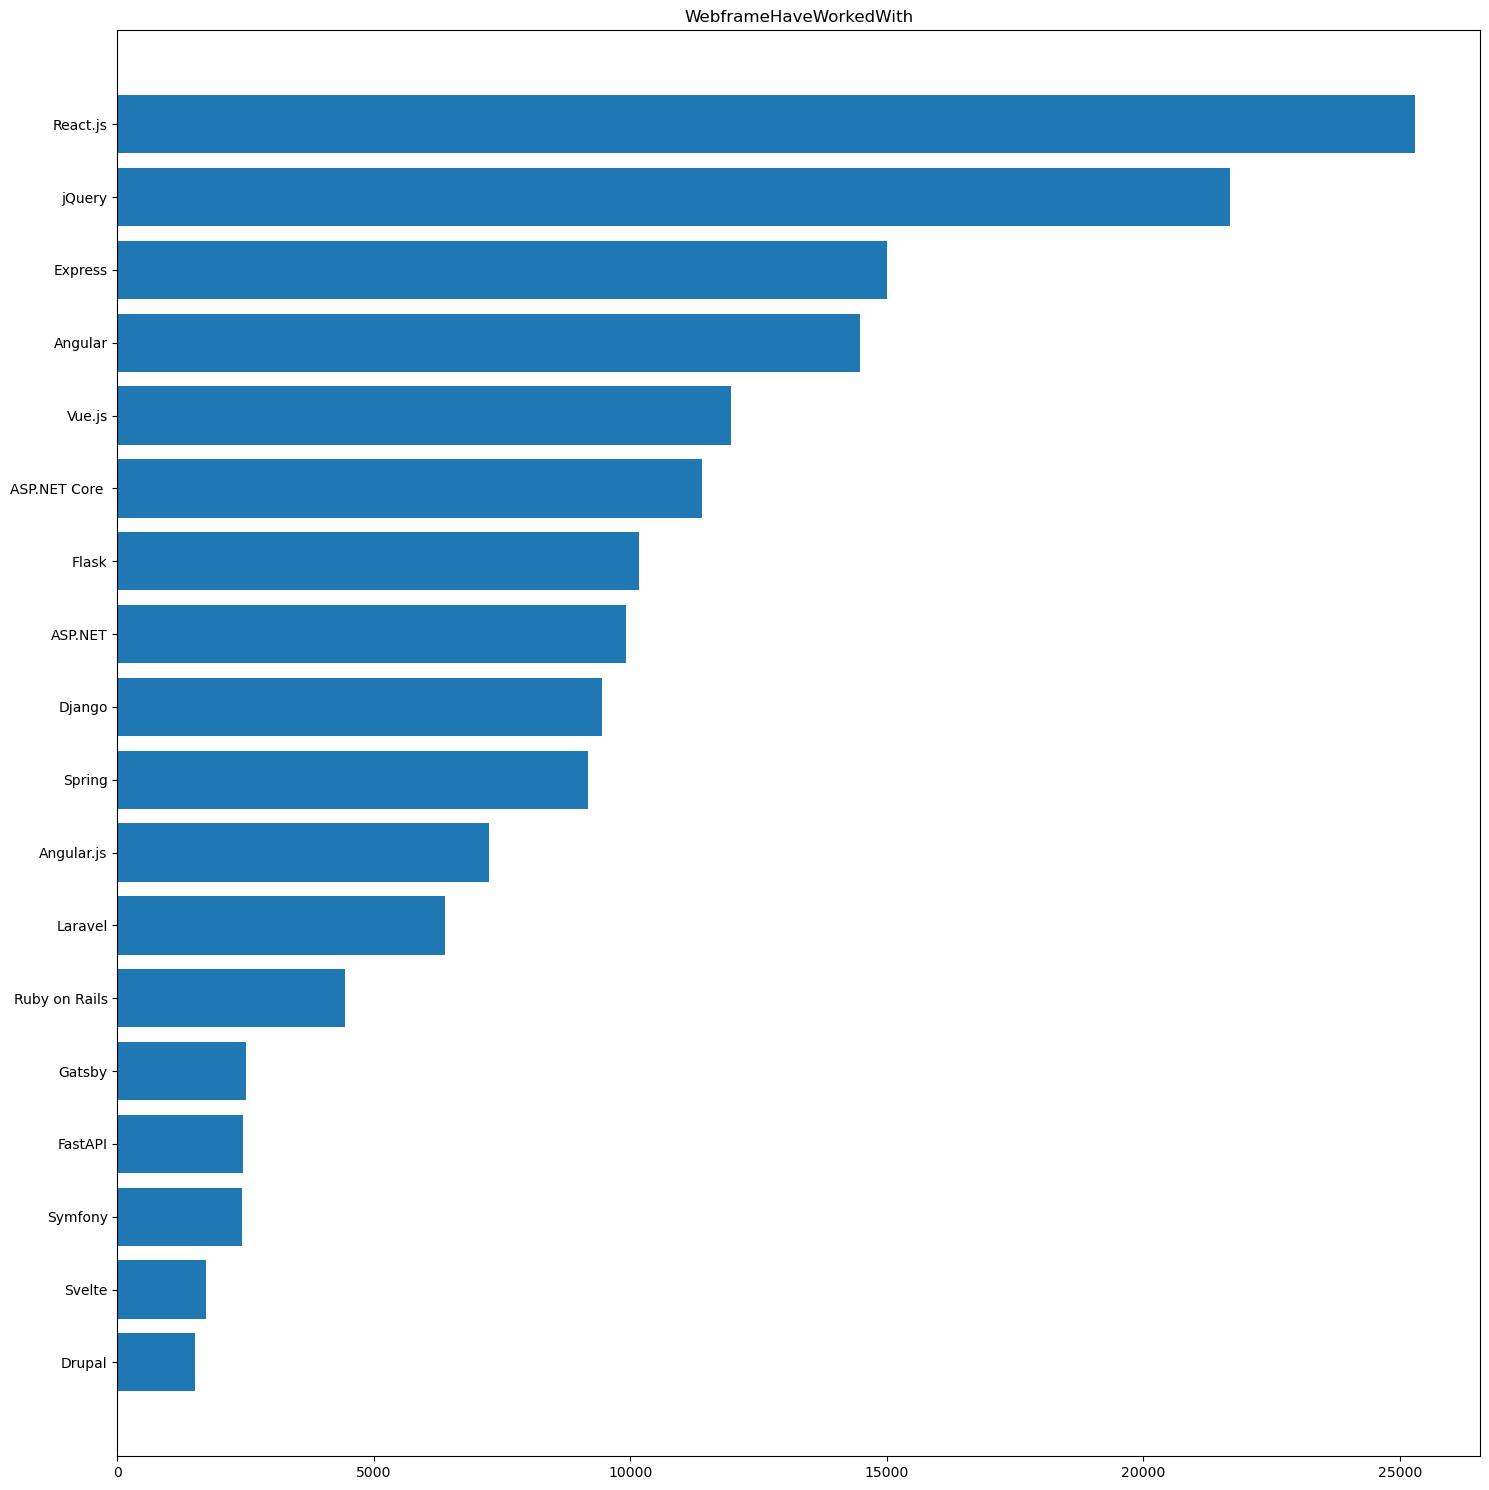

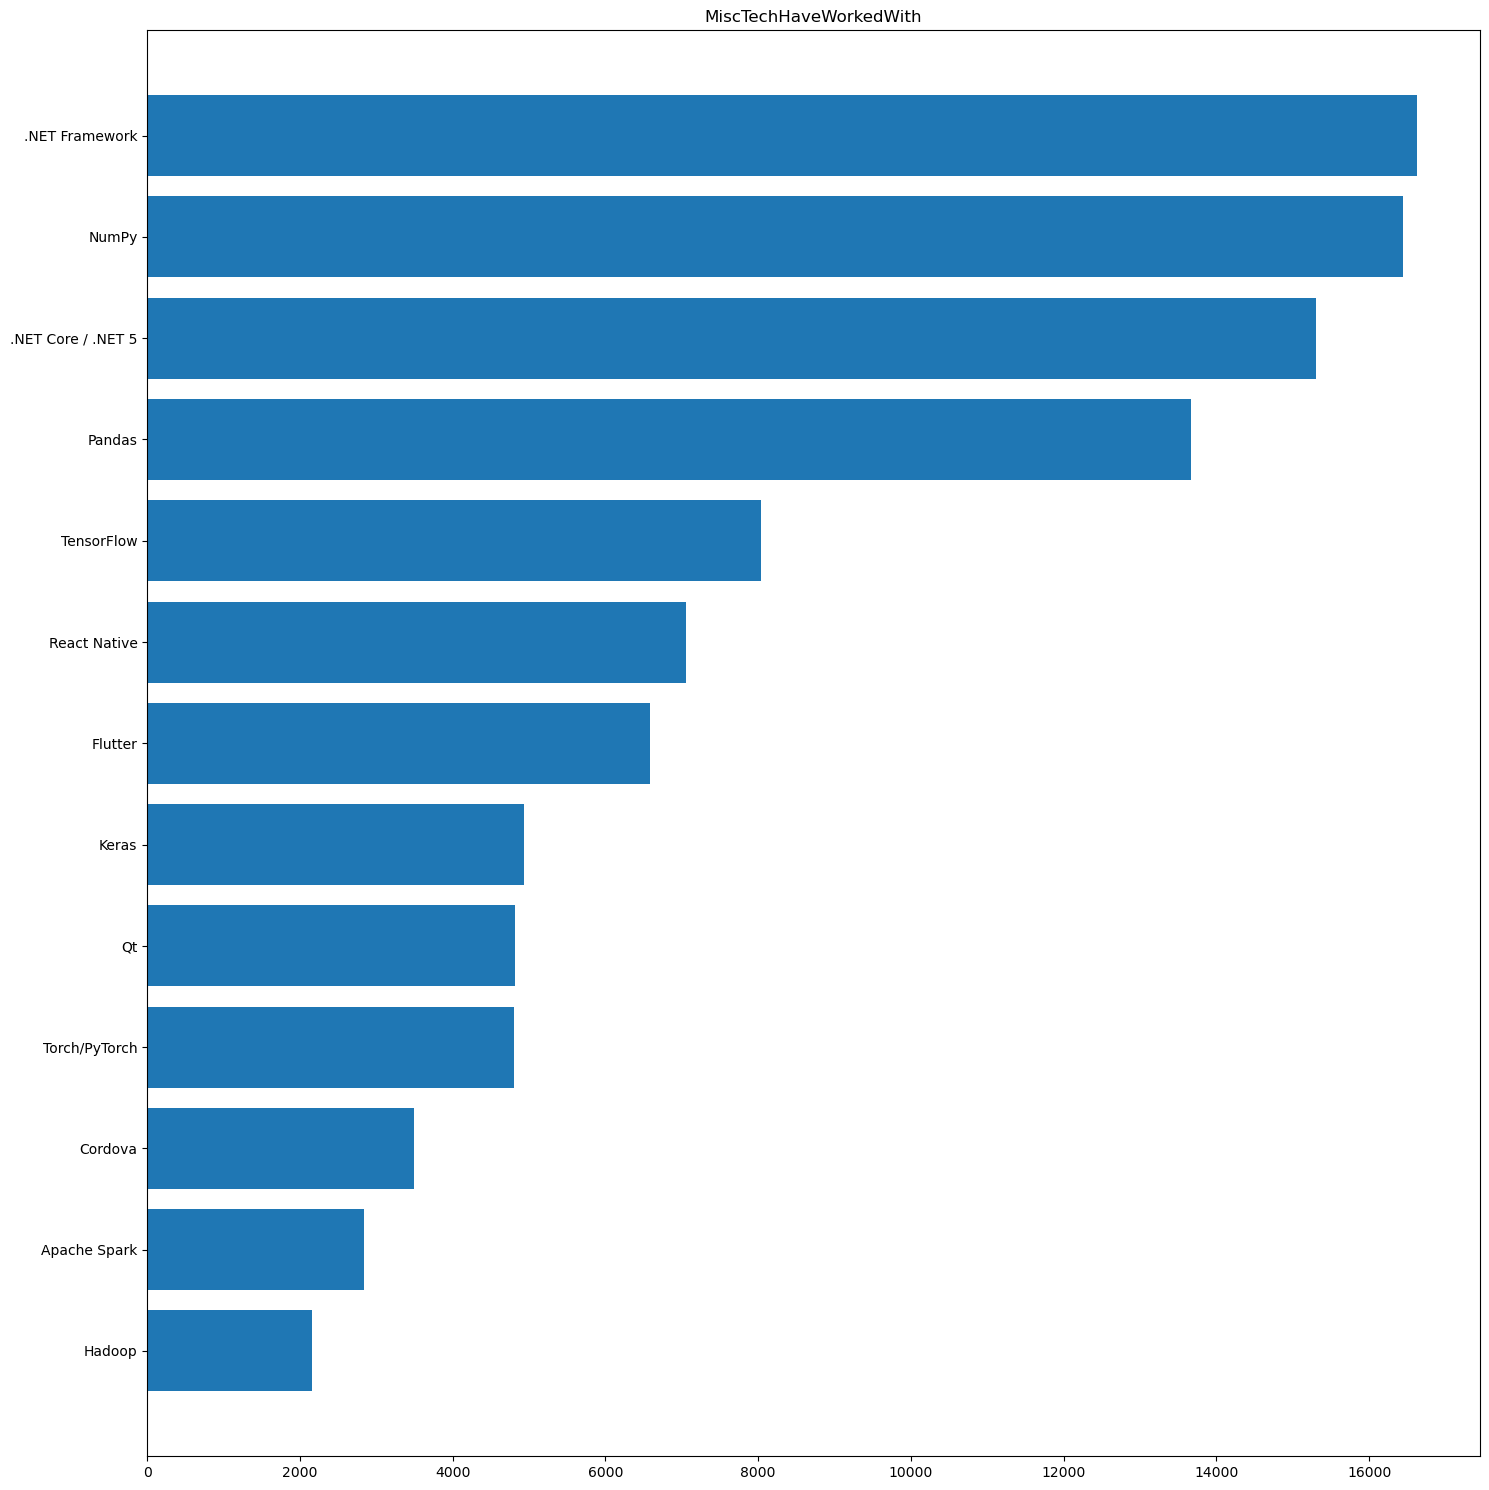

In [17]:
#techs
techs = ['LanguageHaveWorkedWith','LanguageWantToWorkWith', 'DatabaseHaveWorkedWith','PlatformHaveWorkedWith', 
          'WebframeHaveWorkedWith','MiscTechHaveWorkedWith']


# Unique answers which contain all multiple answers for skills 
# form the previous notebook 
unique_answers = pd.read_pickle("..//Datasets//unique_answers.pkl")

# make plotting func 
def draw_skill(i) : 
    plt.figure(figsize=(15,15))
    skill = unique_answers[i]
    skill = skill.sort_values(ascending=True)
    plt.barh(skill.index,skill.values)
    plt.title(i)
    plt.tight_layout()
    
    
#plot each item 
for i in techs : 
    draw_skill(i)
    
    #save image in png format with whole image view
    plt.savefig(f"..//Figures//{i}.png",bbox_inches='tight')
    

 ### 3- Jobs / techs relationship <a name="jobs-skills-relationship"></a>
* Correlted jobs and programming languages 
* whole skills vs jobs
<hr>

* ###  Correlted jobs and programming languages

In [18]:
learned_lang = pd.read_pickle("..//Datasets//LanguageHaveWorkedWith.pkl")
m,n = len(jobs.columns),len(learned_lang.columns)
                            
learned_lang_jobs_corr = np.zeros((m,n))
for a in range(m) : 
    for b in range(n) :
        learned_lang_jobs_corr[a,b] = jobs[jobs.columns[a]].corr(learned_lang[learned_lang.columns[b]])



In [19]:
learned_lang_jobs_corr_matrix = pd.DataFrame(learned_lang_jobs_corr,
            columns=learned_lang.columns,
            index = jobs.columns)

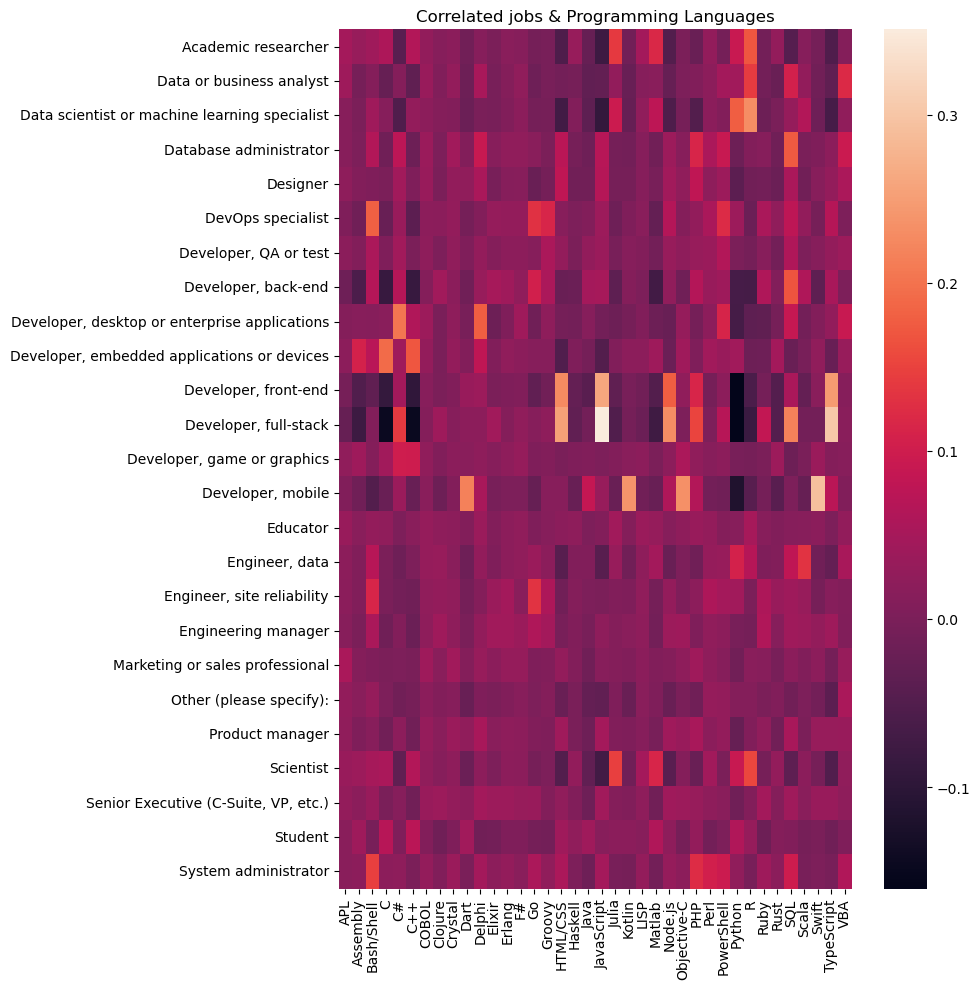

In [20]:


plt.figure(figsize=(10,10))
se.heatmap(learned_lang_jobs_corr_matrix)
plt.title("Correlated jobs & Programming Languages")
plt.tight_layout()

plt.savefig("..//Figures//Correlated_jobs_Programming_Languages",bbox_inches='tight')

* ### Correlated jobs and skills

In [21]:
# determine skills 
skills = ['DatabaseHaveWorkedWith','PlatformHaveWorkedWith','WebframeHaveWorkedWith'] # , LanguageHaveWorkedWith 

# LanguageHaveWorkedWith used as initial dataset to append the remailing sets
df = pd.read_pickle("..//Datasets//LanguageHaveWorkedWith.pkl")

for i in skills : 
    skill = pd.read_pickle(f"..//Datasets//{i}.pkl")
    df = pd.concat([df,skill],axis=1)

In [22]:
# make correlation matrix to two data sets without repeating columns
def make_corr(df) : 
    #dimensions of new dataset
    m = len(jobs.columns)
    n = len(df.columns)
    matrix = np.zeros((m,n))
    
    #loop over each column in both datasets and adding the corr to the corresponding item
    for a in range(m) : 
        for b in range(n) :
            matrix[a,b] = jobs[jobs.columns[a]].corr(df[df.columns[b]])
    return matrix


jobs_skills = pd.DataFrame(make_corr(df),
                          columns = df.columns,
                          index = jobs.columns)



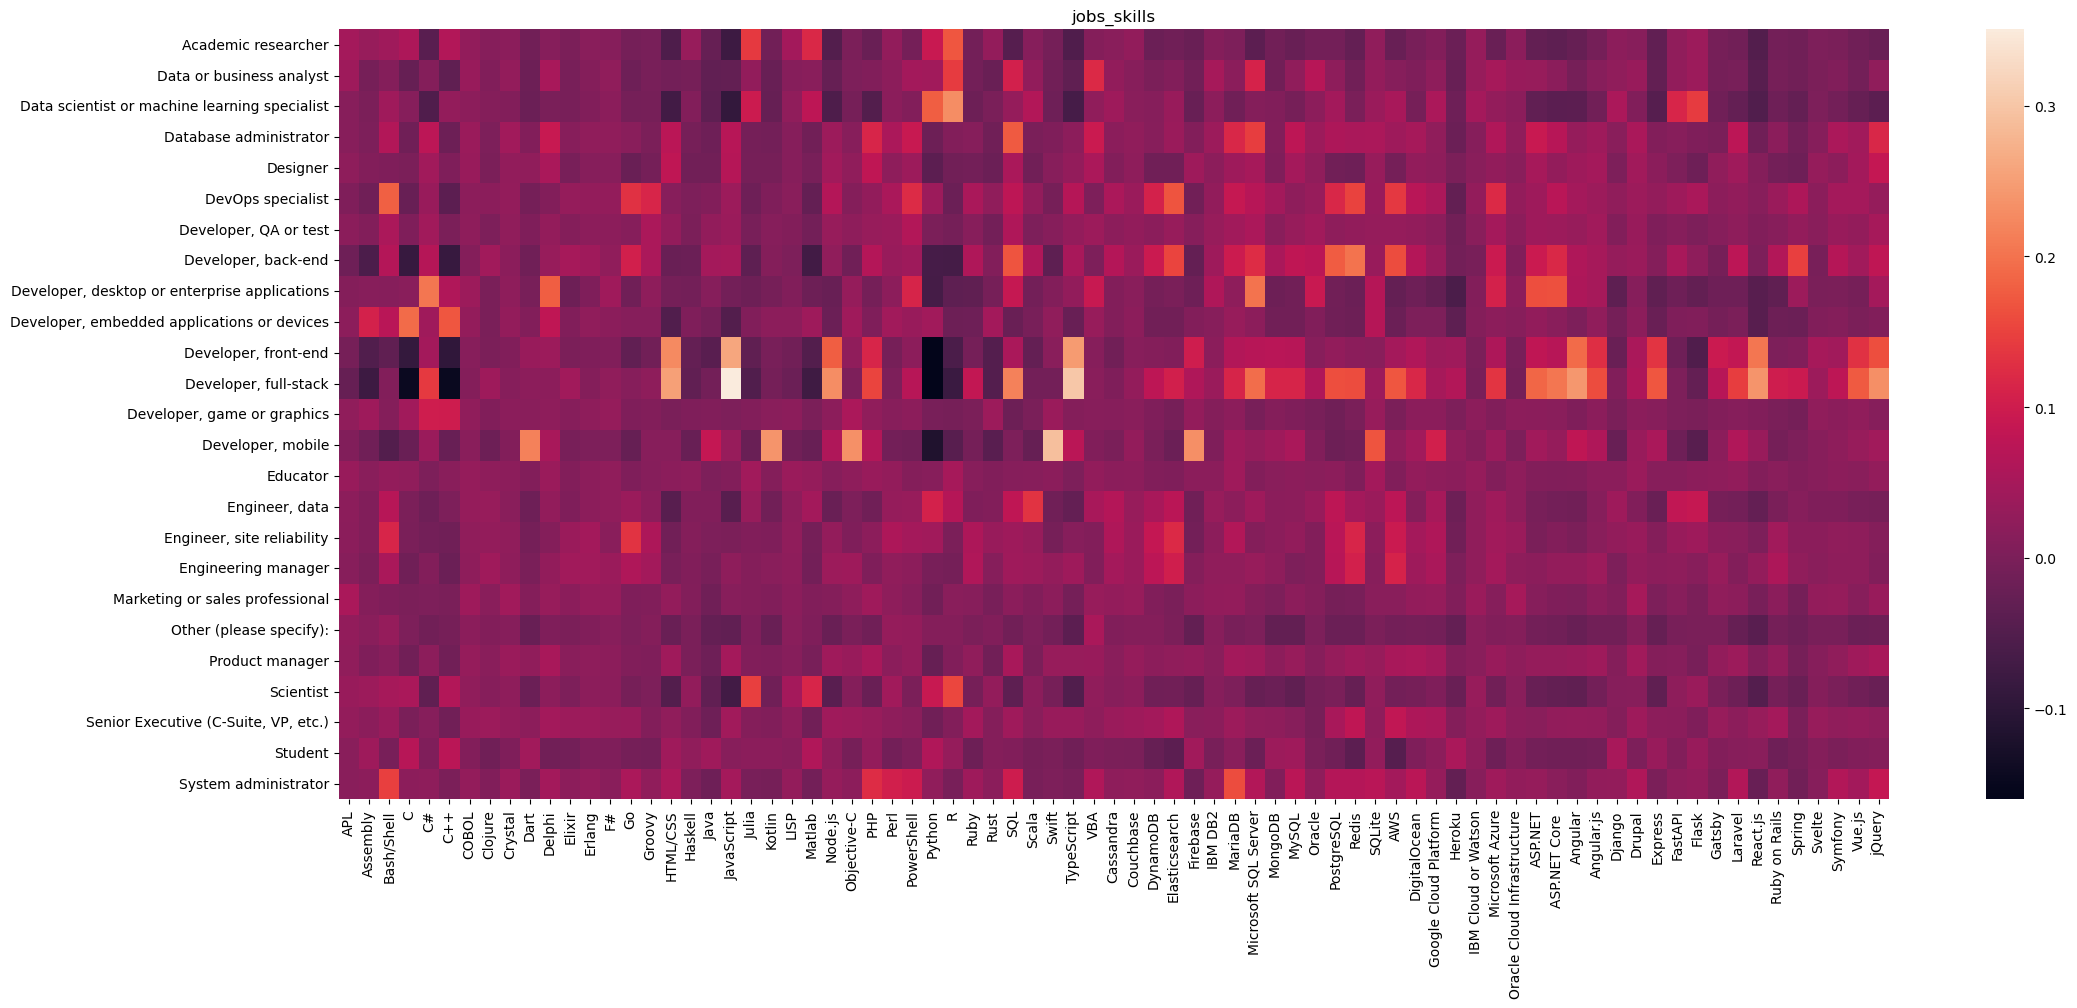

In [23]:
# Heatmap using Seaborn

plt.figure(figsize=(25,10))
se.heatmap(jobs_skills)
plt.title("jobs_skills")

plt.savefig("..//Figures//jobs_skills",bbox_inches='tight')

In [199]:
# make frequencies matrix to two data sets without repeating columns to find every skill freq per job
freq_dict = {}
for i in jobs.columns :
    ndf = pd.concat([jobs[i],df],axis=1)
    freq_dict[i] = ndf.groupby(i).sum().loc[1].values.tolist()
        
        
skills_jobs_freq = pd.DataFrame(freq_dict,index=df.columns)

In [203]:
skills_jobs_freq = skills_jobs_freq.T

In [217]:
skills_jobs_freq.head()

,APL,Assembly,Bash/Shell,C,C#,C++,COBOL,Clojure,Crystal,Dart,...,Flask,Gatsby,Laravel,React.js,Ruby on Rails,Spring,Svelte,Symfony,Vue.js,jQuery
Academic researcher,78,275,1065,957,512,1114,45,81,38,129,...,546,73,178,532,118,254,65,82,339,607
Data or business analyst,79,185,1099,601,1130,660,63,87,57,150,...,677,93,275,798,182,349,81,130,488,1165
Data scientist or machine learning specialist,48,239,1494,980,740,1254,48,106,36,167,...,1371,87,195,866,161,307,93,95,453,805
Database administrator,60,325,2120,1061,2280,1201,85,112,101,381,...,723,164,855,1579,385,558,152,363,1128,2534
Designer,63,294,1281,960,1647,1149,72,84,64,382,...,469,217,564,1483,207,413,177,196,969,1911


In [213]:
# pltoting correlations and frequency 

def plot_freq_corr(job) : 
    #making one matrix combine correlation and frequenct to calculate both specificity , frequency 
    freq = skills_jobs_freq.loc[job]
    corr = jobs_skills.loc[job]
    df = pd.concat([corr,freq],
                   keys=("corr","freq"),axis=1).sort_values(by="freq")
                   
    plt.figure(figsize=(15,15))
    plt.title(job)
    # Create a colormap based on the values in the 'corr' column
    norm = Normalize(vmin=min(df['corr']), vmax=max(df['corr']))
    colors = cm.viridis(norm(df['corr']))

    plt.barh(y = df.index,
           width = df.freq.values,
             color = colors
            )
    
    # Create a ScalarMappable to add a color bar legend
    sm = plt.cm.ScalarMappable(cmap=cm.viridis, norm=norm)
    sm.set_array([])  # You need to set a dummy array for the mappable
    cbar = plt.colorbar(sm, orientation='vertical', pad=0.2)
    cbar.set_label('Values')
    
    
    
    


In [214]:
jobs.columns

Index(['Academic researcher', 'Data or business analyst',
       'Data scientist or machine learning specialist',
       'Database administrator', 'Designer', 'DevOps specialist',
       'Developer, QA or test', 'Developer, back-end',
       'Developer, desktop or enterprise applications',
       'Developer, embedded applications or devices', 'Developer, front-end',
       'Developer, full-stack', 'Developer, game or graphics',
       'Developer, mobile', 'Educator', 'Engineer, data',
       'Engineer, site reliability', 'Engineering manager',
       'Marketing or sales professional', 'Other (please specify):',
       'Product manager', 'Scientist', 'Senior Executive (C-Suite, VP, etc.)',
       'Student', 'System administrator'],
      dtype='object')

C:\Users\PC\AppData\Local\Temp\ipykernel_9024\3573083532.py:24: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical', pad=0.2)


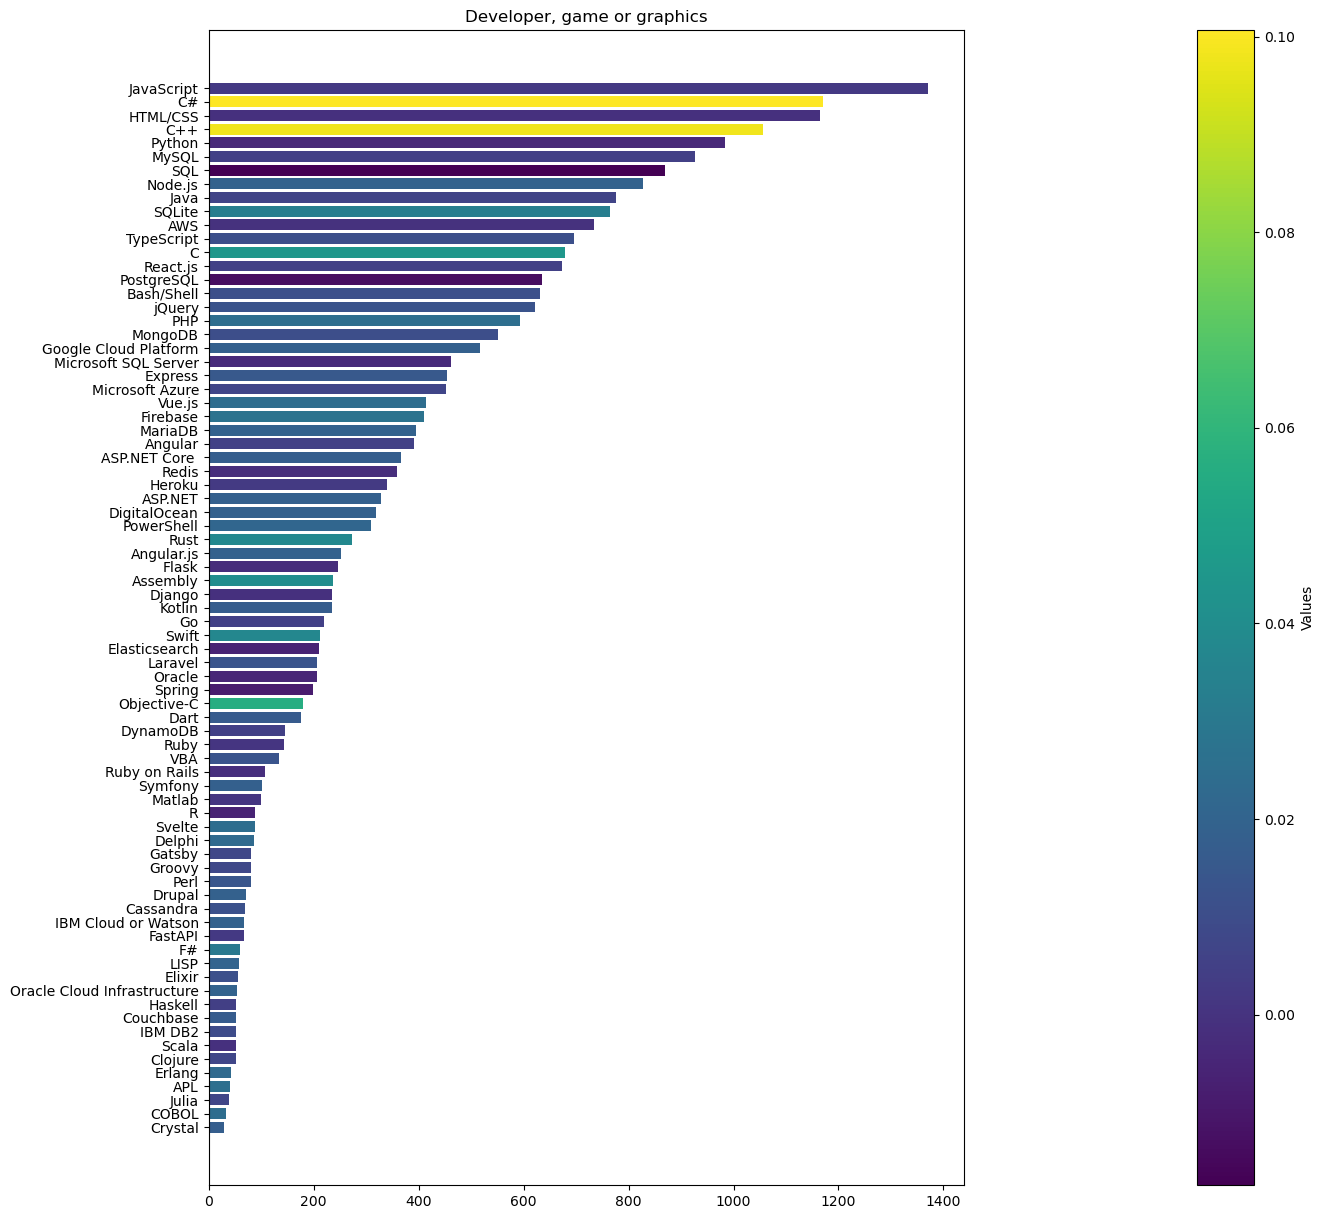

In [216]:
plot_freq_corr('Developer, game or graphics')   